In [37]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="Poli@FSA1782")
cur = cnx.cursor()

In [52]:
cur.execute("SHOW DATABASES")
for db in cur:
    print(db)

('angajati',)
('baza_de_date_4',)
('db_privilegii',)
('facultate',)
('firma',)
('geografie',)
('information_schema',)
('library',)
('magazin_online',)
('movies',)
('mydb',)
('mysql',)
('online_store',)
('performance_schema',)
('personal',)
('prima_baza_de_date',)
('python_created_db',)
('social_media',)
('sys',)
('universitate',)
('vremea',)


In [58]:
if(cnx == None):
  print("There is no connection to database.")
else:
  print("Connection to database is created.")

Connection to database is created.


In [63]:
cur.execute('USE movies')

In [67]:
query = """SELECT genre.name_genre, movie.buget  FROM movie
JOIN movie_genre ON movie.id_movie = movie_genre.id_movie
JOIN genre ON movie_genre.id_genre = genre.id_genre;"""

In [97]:

df = pd.read_sql_query(query, cnx)
print(df)



   name_genre        buget
0      Action  460000000.0
1   Adventure  460000000.0
2          SF  460000000.0
3      Action  200000000.0
4   Adventure  200000000.0
5     Fantasy  145000000.0
6      Comedy  145000000.0
7      Action  170000000.0
8       Drama  170000000.0
9      Action   15000000.0
10  Animation   15000000.0
11     Action  185000000.0
12      Drama  185000000.0
13      Crime  185000000.0
14      Drama  100000000.0


C:\Users\alina\AppData\Local\Temp\ipykernel_15496\937686811.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


In [98]:
print(df.columns)

Index(['name_genre', 'buget'], dtype='object')


In [99]:
df_buget_genre = df.groupby('name_genre')['buget'].mean()
print(df_buget_genre)

name_genre
Action       2.060000e+08
Adventure    3.300000e+08
Animation    1.500000e+07
Comedy       1.450000e+08
Crime        1.850000e+08
Drama        1.516667e+08
Fantasy      1.450000e+08
SF           4.600000e+08
Name: buget, dtype: float64


In [100]:
print(df.describe())

              buget
count  1.500000e+01
mean   2.063333e+08
std    1.437193e+08
min    1.500000e+07
25%    1.450000e+08
50%    1.850000e+08
75%    2.000000e+08
max    4.600000e+08


In [101]:
query_2 = "SELECT id_movie, title, buget FROM movie"
df_movie = pd.read_sql(query_2, cnx)
 # Displaying the first 5 rows of data
print(df_movie.head())

df_grouped = df_movie.groupby("buget")["id_movie"].count()


   id_movie                                              title        buget
0         1                           Avatar: The Way of Water  460000000.0
1         2                            Spider-Man: No Way Home  200000000.0
2         3                                             Barbie  145000000.0
3         4                                  Top Gun: Maverick  170000000.0
4         6  Demon Slayer: Kimetsu no Yaiba - The Movie: Mu...   15000000.0


C:\Users\alina\AppData\Local\Temp\ipykernel_15496\3640309214.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_movie = pd.read_sql(query_2, cnx)


C:\Users\alina\AppData\Local\Temp\ipykernel_15496\2097328211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_buget_genre.index, y=df_buget_genre.values, palette="viridis")


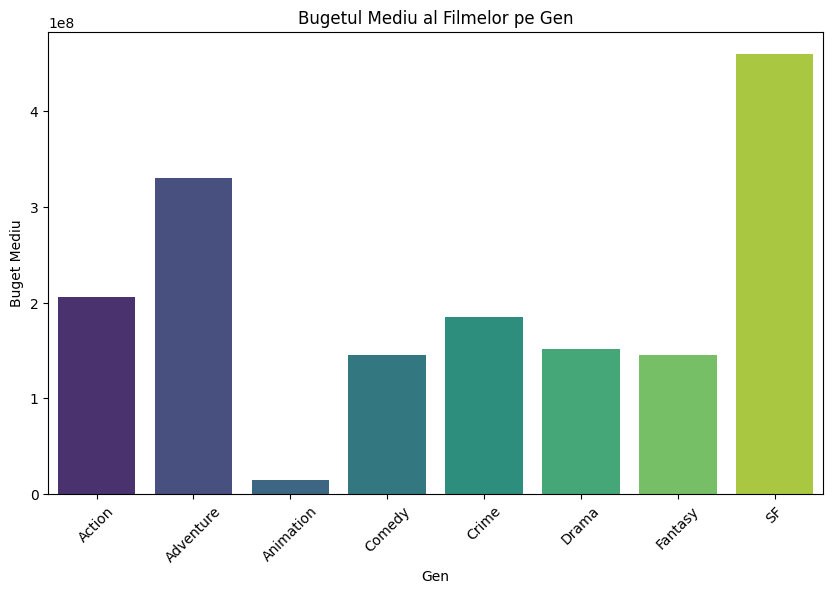

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_buget_genre.index, y=df_buget_genre.values, palette="viridis")
plt.title('Bugetul Mediu al Filmelor pe Gen')
plt.xlabel('Gen')
plt.ylabel('Buget Mediu')
plt.xticks(rotation=45)

# Rotating labels if there are many
plt.show()